<a href="https://colab.research.google.com/github/Mayank2225/Machine-Learning-Application-for-Mechanical-Engineering/blob/main/Finance_project_210598_Mayank_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

You can dowload the historical data from the online site **Yahoo finance** and upload to colab to use it!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: In Cell next to this one there are the steps to get the data.*

### The Imports

Already filled out for you.

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data from Yahoo Finance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Go to Yahoo Finance and search for the bank.
2. Download the Historical data for the given time.
3. Upload the data in the colab and read it using pd.read_csv().

    
    # Bank of America
    BAC = pd.read_csv('Bank_of_America.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()
BAC = pd.read_csv('BAC.csv')
C = pd.read_csv('C.csv')
GS = pd.read_csv('GS.csv')
JPM = pd.read_csv('JPM.csv')
MS = pd.read_csv('MS.csv')
WFC = pd.read_csv('WFC.csv')

Saving BAC.csv to BAC.csv
Saving C.csv to C.csv
Saving GS.csv to GS.csv
Saving JPM.csv to JPM.csv
Saving MS.csv to MS.csv
Saving WFC.csv to WFC.csv


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

*You may check the below given dataframe to figure out whatever is demanded.*
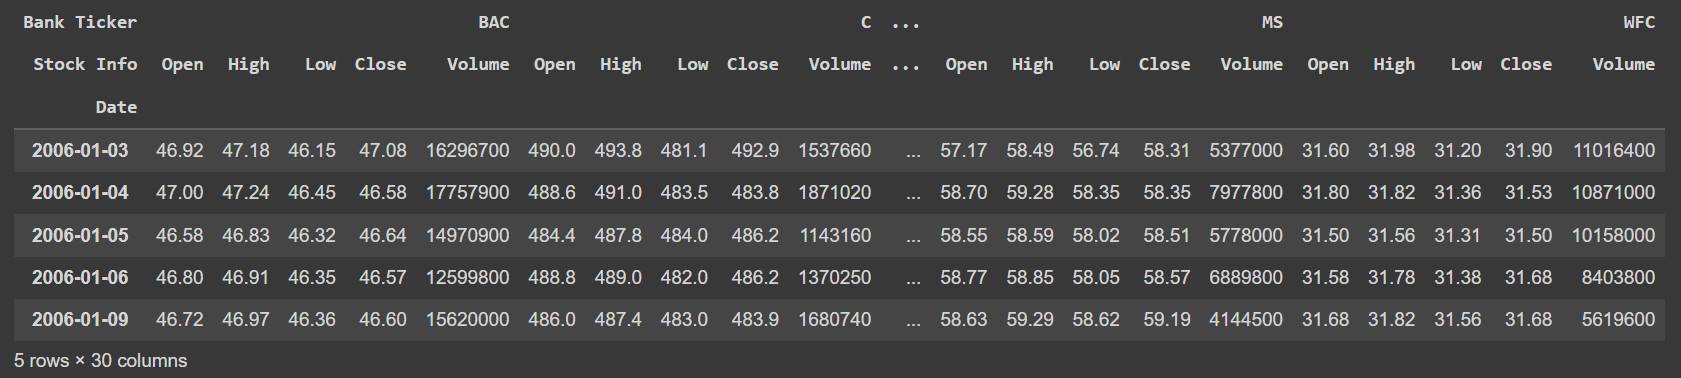

In [ ]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
type(tickers)

list

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
print(bank_stocks)


             BAC                                                         \
            Date       Open       High        Low      Close  Adj Close   
0     2006-01-03  46.919998  47.180000  46.150002  47.080002  33.170307   
1     2006-01-04  47.000000  47.240002  46.450001  46.580002  32.818035   
2     2006-01-05  46.580002  46.830002  46.320000  46.639999  32.860317   
3     2006-01-06  46.799999  46.910000  46.349998  46.570000  32.810997   
4     2006-01-09  46.720001  46.970001  46.360001  46.599998  32.832123   
...          ...        ...        ...        ...        ...        ...   
2512  2015-12-24  17.320000  17.379999  17.219999  17.270000  15.006730   
2513  2015-12-28  17.219999  17.230000  16.980000  17.129999  14.885075   
2514  2015-12-29  17.250000  17.350000  17.160000  17.280001  15.015417   
2515  2015-12-30  17.200001  17.240000  17.040001  17.049999  14.815557   
2516  2015-12-31  17.010000  17.070000  16.830000  16.830000  14.624391   

                        

**Set the column name levels (this is filled out for you):**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [ ]:
bank_stocks.head()

Bank Ticker         BAC                                              \
Stock Info         Date       Open       High        Low      Close   
0            2006-01-03  46.919998  47.180000  46.150002  47.080002   
1            2006-01-04  47.000000  47.240002  46.450001  46.580002   
2            2006-01-05  46.580002  46.830002  46.320000  46.639999   
3            2006-01-06  46.799999  46.910000  46.349998  46.570000   
4            2006-01-09  46.720001  46.970001  46.360001  46.599998   

Bank Ticker                                C                          ...  \
Stock Info   Adj Close    Volume        Date        Open        High  ...   
0            33.170307  16296700  2006-01-03  490.000000  493.799988  ...   
1            32.818035  17757900  2006-01-04  488.600006  491.000000  ...   
2            32.860317  14970700  2006-01-05  484.399994  487.799988  ...   
3            32.810997  12599800  2006-01-06  488.799988  489.000000  ...   
4            32.832123  15619400  2006-01-09  486.000000  487.399994  ...   

Bank Ticker         MS                             WFC                        \
Stock Info       Close  Adj Close   Volume        Date       Open       High   
0            58.310001  34.886642  5377000  2006-01-03  31.600000  31.975000   
1            58.349998  34.910572  7977800  2006-01-04  31.799999  31.820000   
2            58.509998  35.006290  5778000  2006-01-05  31.500000  31.555000   
3            58.570000  35.042187  6889800  2006-01-06  31.580000  31.775000   
4            59.189999  35.413139  4144500  2006-01-09  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
0            31.195000  31.900000  19.975792  11016400  
1            31.365000  31.530001  19.744110  10870000  
2            31.309999  31.495001  19.722187  10158000  
3            31.385000  31.680000  19.838036   8403800  
4            31.555000  31.674999  19.834904   5619600  

[5 rows x 42 columns]

# EDA

Let's explore the data a bit! We want you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


**What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
bank_stocks.xs('Close', axis = 1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns=pd.DataFrame()

**We can use pandas pct_change() method or any other method you prefer on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
for i in tickers:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2512,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2513,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2514,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2515,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [ ]:
import seaborn

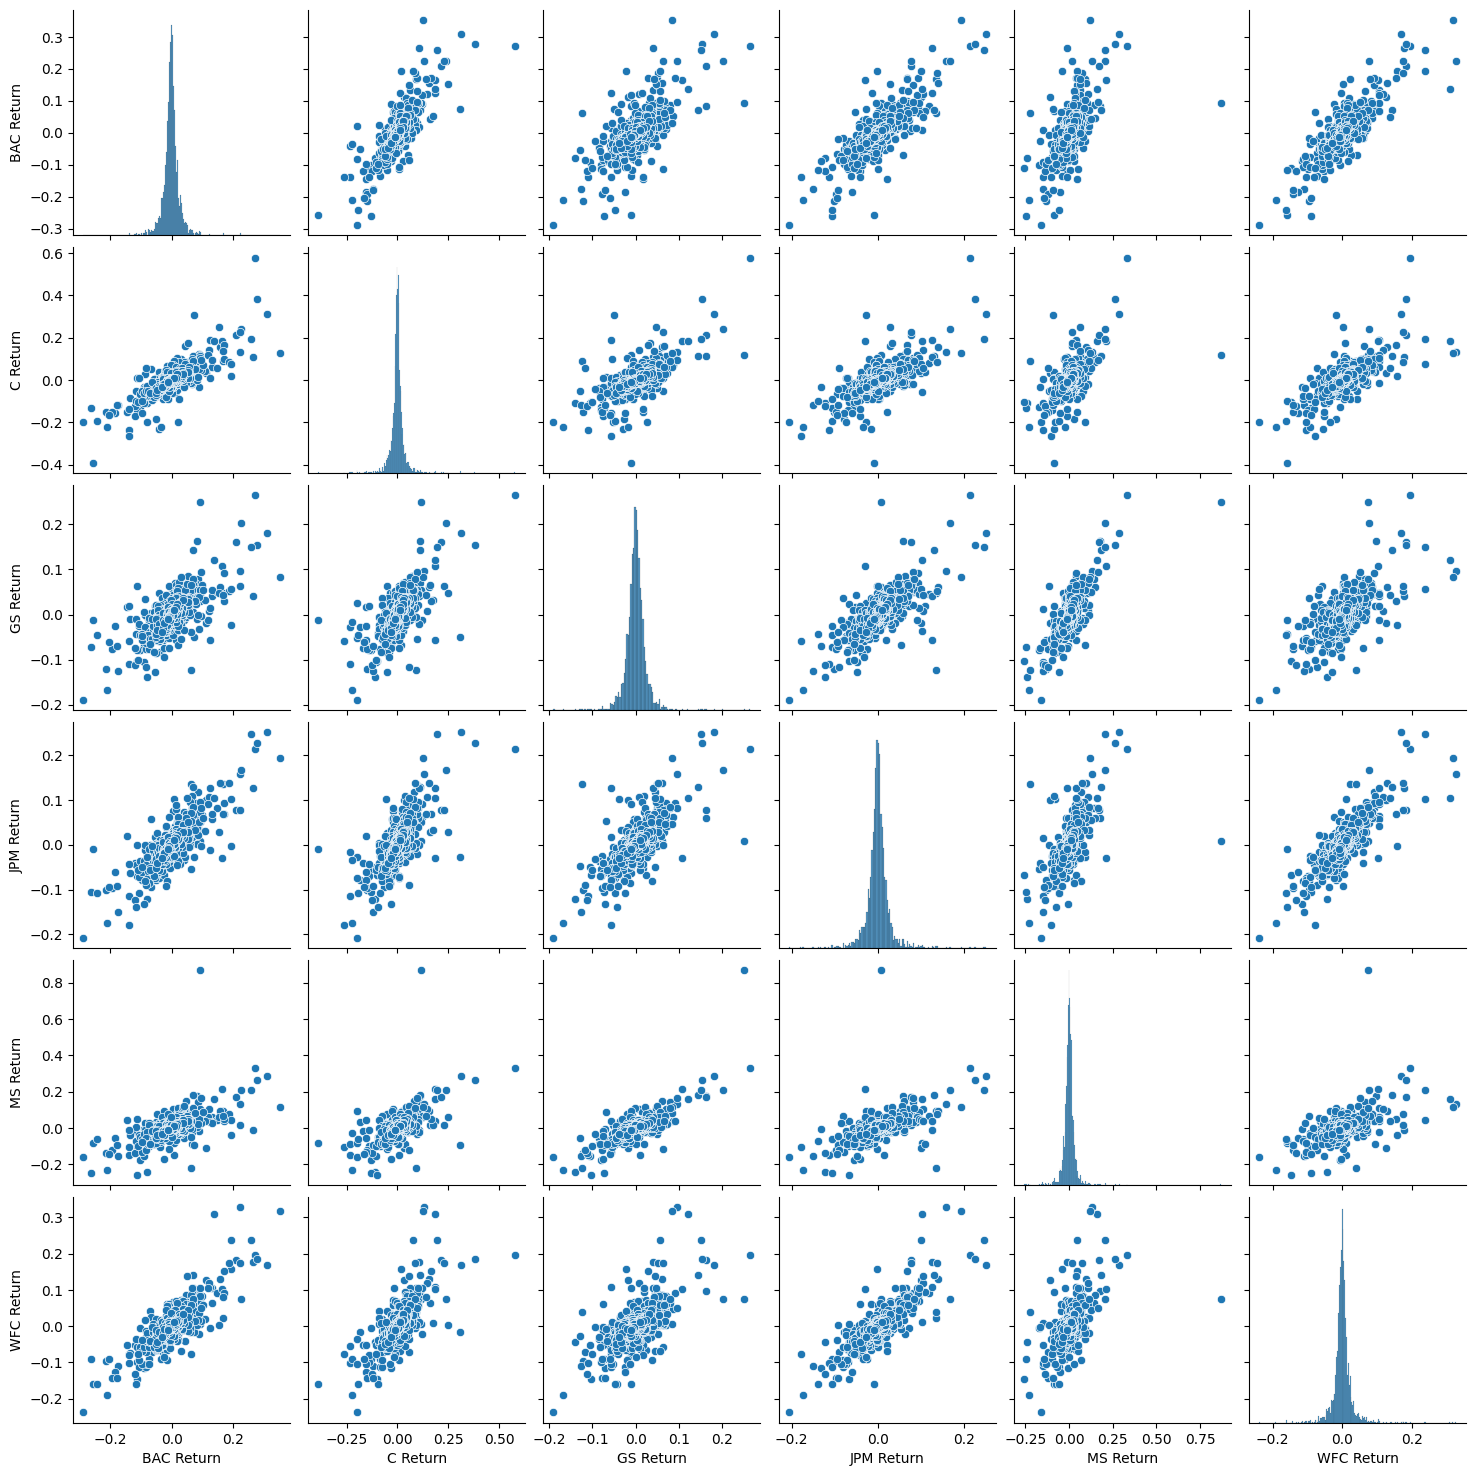

In [ ]:
seaborn.pairplot(data = returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that a few of the banks share the same day for the worst drop, did anything significant happen that day?**

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

____
# More Visualization

Feel free to use any of your preferred visualization libraries to try to recreate the described plot below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

# Great Job!

Definitely a good job if you were able to do all of them, but don't worry if you didn't understand them all, Remember practice makes anyone perfect😎!